In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('friends_episodes_v2.csv')

In [3]:
dataset.head()

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
1,1994,1,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
2,1994,1,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
3,1994,1,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438
4,1994,1,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,8.1,4274


Lets start by getting the total duration of each season

In [4]:
grouped_season = dataset.groupby(by = 'Season')

In [5]:
season_duration = grouped_season.Duration.sum().to_frame().reset_index()

In [6]:
season_duration

,Season,Duration
0,1,506
1,2,528
2,3,550
3,4,544
4,5,528
5,6,582
6,7,528
7,8,528
8,9,544
9,10,412


In [7]:
season_duration.columns

Index(['Season', 'Duration'], dtype='object')

Lets plot and visualize the results

Text(0,0.5,'Duration')

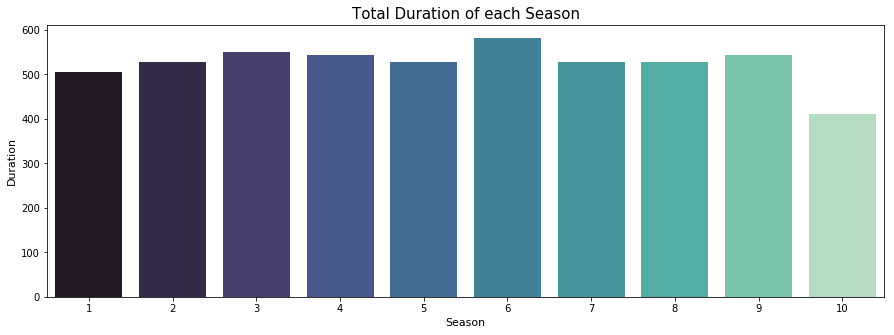

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x=season_duration.Season, y=season_duration.Duration, palette='mako')
plt.title('Total Duration of each Season', fontsize=15)
plt.xlabel('Season', fontsize=11)
plt.ylabel('Duration', fontsize=11)

So, we can see season 6 is the lengthiest season of all the seasons of F.R.I.E.N.D.S!

Lets now get the average rating across all the seasons!

In [9]:
average_rating = grouped_season.Stars.mean().to_frame().reset_index()

In [10]:
type(average_rating)

pandas.core.frame.DataFrame

In [11]:
average_rating

,Season,Stars
0,1,8.317391
1,2,8.458333
2,3,8.408000
3,4,8.475000
4,5,8.637500
5,6,8.496000
6,7,8.437500
7,8,8.445833
8,9,8.291667
9,10,8.677778


In [12]:
average_rating.columns

Index(['Season', 'Stars'], dtype='object')

(8.2, 8.8)

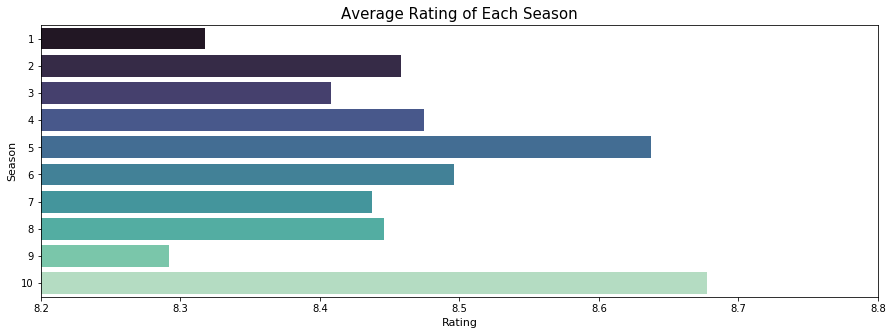

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(y=average_rating.Season, x=average_rating.Stars, palette='mako', orient='h')
plt.title('Average Rating of Each Season', fontsize=15)
plt.xlabel('Rating', fontsize=11)
plt.ylabel('Season', fontsize=11)
plt.xlim(8.2,8.8)

Now, lets see the highest rated episode in each season

In [14]:
highest_rated_episode_per_season = grouped_season.Stars.max().to_frame().reset_index()

In [15]:
highest_rated_episode_per_season

,Season,Stars
0,1,9.0
1,2,9.4
2,3,9.1
3,4,9.5
4,5,9.7
5,6,9.3
6,7,9.2
7,8,9.3
8,9,8.8
9,10,9.7


In [16]:
episodes = []
for season,stars in highest_rated_episode_per_season.get_values():
    for season_datset, episode_title, stars_dataset in dataset[['Season','Episode_Title','Stars']].get_values():
        if season == season_datset and stars_dataset == stars :
            episodes.append([season_datset, episode_title, stars_dataset])

In [17]:
episodes

[[1, 'The One with the Blackout', 9.0],
 [2, 'The One with the Prom Video', 9.4],
 [3, 'The One with the Flashback', 9.1],
 [3, 'The One with the Morning After', 9.1],
 [4, 'The One with the Embryos', 9.5],
 [5, 'The One Where Everybody Finds Out', 9.7],
 [6, 'The One with the Proposal', 9.3],
 [7, "The One with Monica and Chandler's Wedding: Part 2", 9.2],
 [8, 'The One with the Videotape', 9.3],
 [8, 'The One with the Rumor', 9.3],
 [9, "The One with Rachel's Other Sister", 8.8],
 [10, 'The Last One', 9.7]]

In [18]:
pd.DataFrame(episodes, columns = ['Season', 'Episode Title', 'Stars']).set_index('Season')

,Episode Title,Stars
Season,,
1,The One with the Blackout,9.0
2,The One with the Prom Video,9.4
3,The One with the Flashback,9.1
3,The One with the Morning After,9.1
4,The One with the Embryos,9.5
5,The One Where Everybody Finds Out,9.7
6,The One with the Proposal,9.3
7,The One with Monica and Chandler's Wedding: Pa...,9.2
8,The One with the Videotape,9.3
